In [5]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


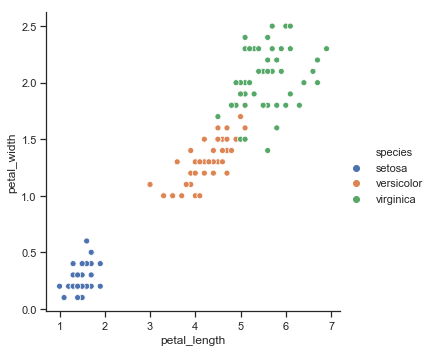

In [2]:
sns.relplot(x="petal_length", y="petal_width", hue="species", data=iris)

## <font color='blue'>從上觀察到 petal_length	petal_width 有不錯的區分效果

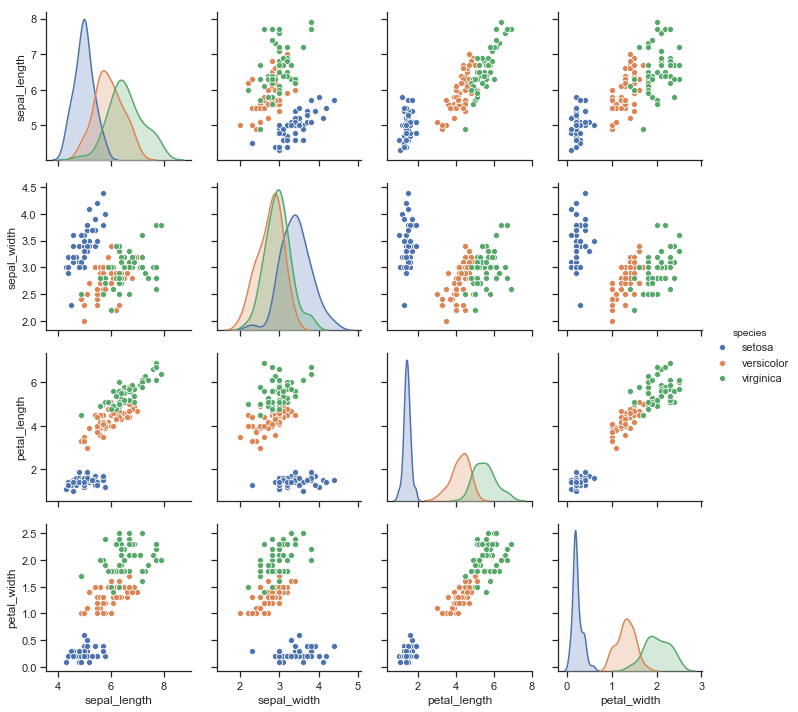

In [3]:
sns.pairplot(hue="species", data=iris.iloc[:,:])

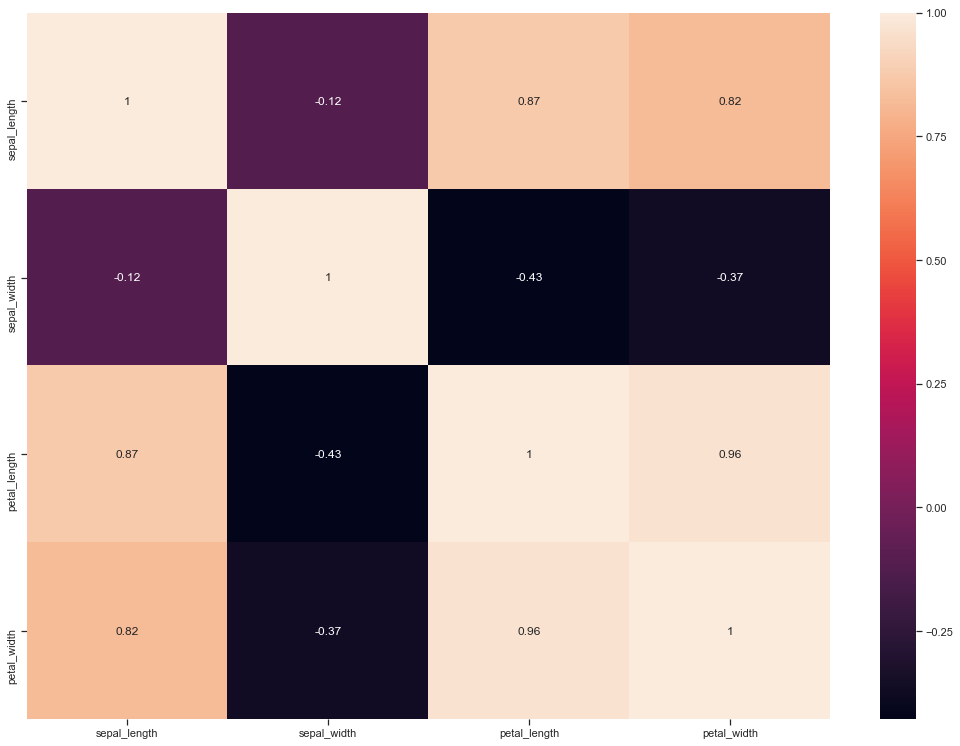

In [6]:
plt.figure(figsize=(18,13))
sns.heatmap(iris.corr(), annot=True)

## <font color='blue'>綜觀來看，petal_length	, petal_width 的區分效果較佳
## <font color='blue'>所以選定用來訓練模型

In [5]:
from sklearn.svm import SVC, LinearSVC

In [8]:
X = iris.iloc[:, 3:4].values
y = iris["species"].values

In [9]:
model = LinearSVC(random_state=555)

In [10]:
model.fit(X=X, y=y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=555, tol=0.0001,
     verbose=0)

In [11]:
model.score(X=X, y=y)

0.9466666666666667

## <font color='blue'>準確度達到 0.95，可接受

In [12]:
predict_y = model.predict(X=X)

In [13]:
from sklearn import metrics

In [14]:
confmat = metrics.confusion_matrix(y, predict_y)
confmat

array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  3, 47]])

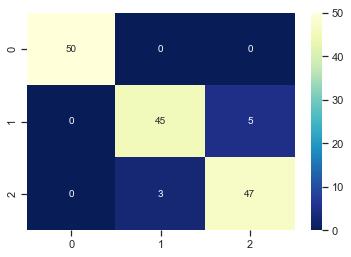

In [15]:
sns.heatmap(confmat, cmap="YlGnBu_r", annot=True, fmt="d")  

## <font color='blue'>將species的結果與預測值做比較，得到不錯的判定效果，結束